In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [2]:
dataset = '../data/NN/keypoint.csv'
model_save_path = '../data/NN/keypoint_classifier.hdf5'

In [3]:
NUM_CLASSES = 4

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 4)                 44        
                                                                 
Total params: 1,114
Trainable params: 1,114
Non-trainable params: 0
_________________________________________________________________


In [9]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(model_save_path, verbose=1, save_weights_only=False)
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/29 [>.............................] - ETA: 13s - loss: 1.3957 - accuracy: 0.2656
Epoch 1: saving model to ../data/NN\keypoint_classifier.hdf5
29/29 [==============================] - 1s 8ms/step - loss: 1.3427 - accuracy: 0.3189 - val_loss: 1.2647 - val_accuracy: 0.4127
Epoch 2/1000
27/29 [==========================>...] - ETA: 0s - loss: 1.2711 - accuracy: 0.3727
Epoch 2: saving model to ../data/NN\keypoint_classifier.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 1.2699 - accuracy: 0.3730 - val_loss: 1.2050 - val_accuracy: 0.4662
Epoch 3/1000
 1/29 [>.............................] - ETA: 0s - loss: 1.2437 - accuracy: 0.3594
Epoch 3: saving model to ../data/NN\keypoint_classifier.hdf5
29/29 [==============================] - 0s 3ms/step - loss: 1.2180 - accuracy: 0.4081 - val_loss: 1.1418 - val_accuracy: 0.5196
Epoch 4/1000
 1/29 [>.............................] - ETA: 0s - loss: 1.1710 - accuracy: 0.4688
Epoch 4: saving model to ../data/NN\keypoint_

In [ ]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 [==============================] - 0s 2ms/step - loss: 0.2064 - accuracy: 0.9724


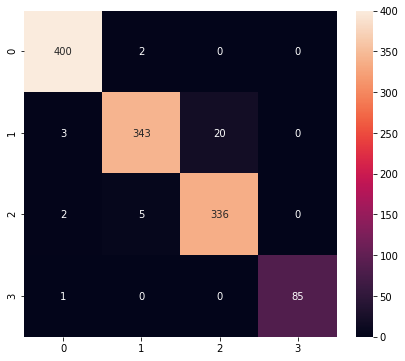

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       402
           1       0.98      0.94      0.96       366
           2       0.94      0.98      0.96       343
           3       1.00      0.99      0.99        86

    accuracy                           0.97      1197
   macro avg       0.98      0.98      0.98      1197
weighted avg       0.97      0.97      0.97      1197



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [ ]:

model.save(model_save_path, include_optimizer=False)